# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!

In [2]:
#import pandas
import pandas as pd

#load dataset
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [5]:
df['crim'].median()

0.26169000000000003

In [6]:
df['rm'].max()

8.725

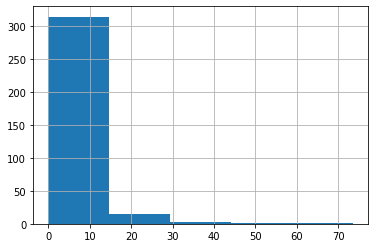

In [11]:
df['crim'].hist(bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1171463c8>,
      dtype=object)

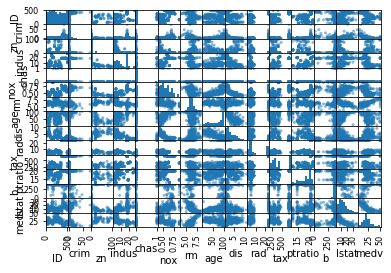

In [12]:
pd.plotting.scatter_matrix(df)

In [14]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

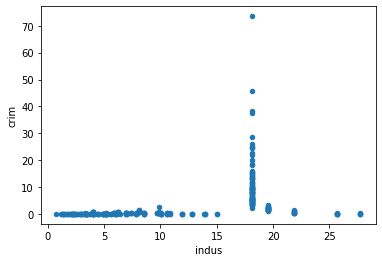

In [15]:
df.plot.scatter('indus', 'crim')

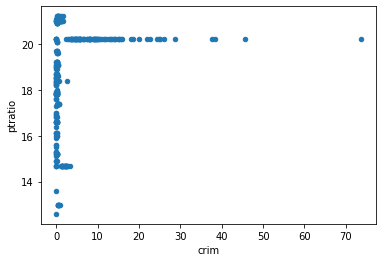

In [17]:
df.plot.scatter('crim', 'ptratio')

In [19]:
df['lstat'].values

array([ 4.98,  9.14,  2.94,  5.33, 12.43, 20.45, 13.27, 15.71,  8.26,
       10.26,  8.47,  6.58, 11.69, 21.02, 13.83, 18.72, 19.88, 17.28,
       22.6 , 13.04, 20.34, 10.13,  4.32,  1.98,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 16.2 , 13.45,  9.43,  8.43, 14.8 ,  4.81,
        5.77,  3.95,  6.86, 13.15, 14.44,  9.5 ,  8.05,  4.67, 10.24,
        8.1 , 13.09,  6.72,  5.52,  7.54,  6.78,  8.94, 11.97, 10.27,
        5.29,  7.22,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  6.21, 10.59, 11.34,  9.42,  7.67, 10.63, 13.44, 18.66,
       14.09, 12.27, 15.55, 10.16, 10.45, 12.04, 10.3 , 15.37, 13.61,
       14.37, 14.27, 17.93, 25.41, 17.58, 27.26, 17.19, 15.39, 12.26,
       15.03, 17.31, 16.9 , 14.59, 21.32, 18.46, 34.41, 26.82, 27.8 ,
       29.53, 28.32, 21.45, 14.1 , 15.79, 15.12, 16.14,  6.43,  7.39,
        5.5 ,  1.73,  3.32, 11.64,  9.81,  3.7 , 12.14, 11.32, 14.43,
       12.03, 14.69,  9.04,  9.64,  5.33, 10.11,  6.29,  6.92,  5.04,
        7.56,  9.45,

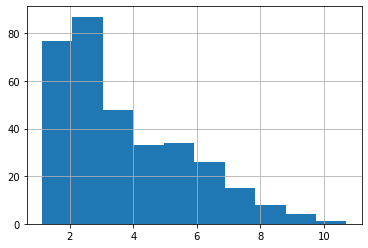

In [22]:
df['dis'].hist()

In [24]:
df['dis'].describe()

count    333.000000
mean       3.709934
std        1.981123
min        1.129600
25%        2.122400
50%        3.092300
75%        5.116700
max       10.710300
Name: dis, dtype: float64

In [41]:
#split dataset into those with dis less than 4 and those greater than or equal to 4
df_close_dis = df[df['dis'] < 4]
df_close_dis.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
15,23,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
20,35,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
21,39,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7


In [42]:
df_far_dis = df[df['dis'] >= 4]

In [27]:
df_far_dis.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [28]:
df_far_dis.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
230,348,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
231,349,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
232,350,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
233,353,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
318,484,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8


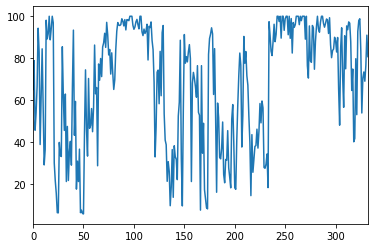

In [29]:
df['age'].plot()

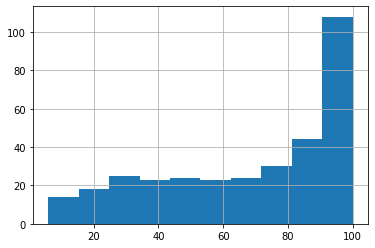

In [30]:
df['age'].hist()

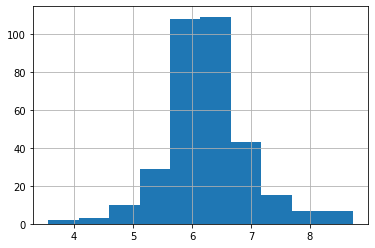

In [31]:
df['rm'].hist()

In [35]:
df['rm'].describe()

count    333.000000
mean       6.265619
std        0.703952
min        3.561000
25%        5.884000
50%        6.202000
75%        6.595000
max        8.725000
Name: rm, dtype: float64

In [36]:
df['rad'].describe()

count    333.000000
mean       9.633634
std        8.742174
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

In [37]:
df['rad'].min()

1

In [38]:
df['rad'].max()

24

In [39]:
low_rad = df[df['rad'] <= 12]
high_rad = df[df['rad'] > 12]

low_rad.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b832470>,
      dtype=object)

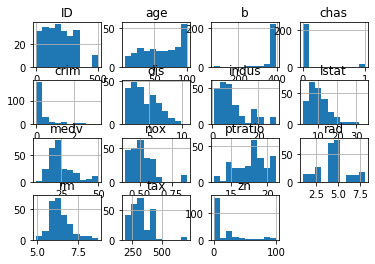

In [40]:
low_rad.hist()

In [43]:
tracts_charles = df[df['chas'] == 1]
away_from_charles = df[df['chas'] == 0]

In [48]:
#evaluate differences in median nitrogen oxide concentrations near and far from Charles
print("Median Nitrogen Oxide Conc., Close to Charles: {}".format(tracts_charles['nox'].median()))
print("Median Nitrogen Oxide Conc., Far from Charles: {}".format(away_from_charles['nox'].median()))

#evaluate differences in crime
print("Median Crime per Capita (Near Charles): {}".format(tracts_charles['crim'].median()))
print("Median Crime per Capita (Far from Charles): {}".format(away_from_charles['crim'].median()))


Median Nitrogen Oxide Conc., Close to Charles: 0.5285
Median Nitrogen Oxide Conc., Far from Charles: 0.5379999999999999
Median Crime per Capita (Near Charles): 0.5720700000000001
Median Crime per Capita (Far from Charles): 0.24522


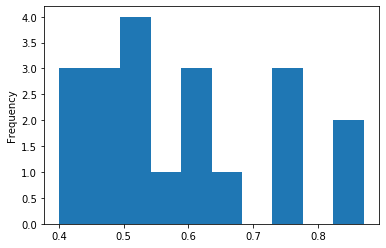

In [78]:
tracts_charles['nox'].plot(kind='hist')

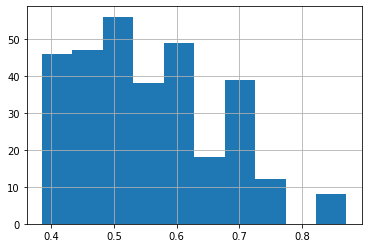

In [72]:
away_from_charles['nox'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c357ba8>],
      dtype=object)

<Figure size 648x216 with 0 Axes>

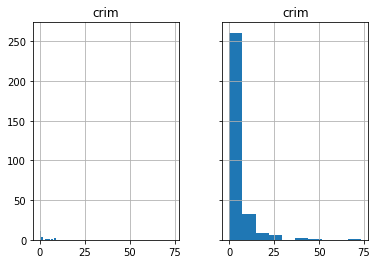

In [91]:
plt.figure(figsize=(9,3))
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
tracts_charles.hist('crim', ax=axes[0])
away_from_charles.hist('crim', ax=axes[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d7514a8>],
      dtype=object)

<Figure size 1296x216 with 0 Axes>

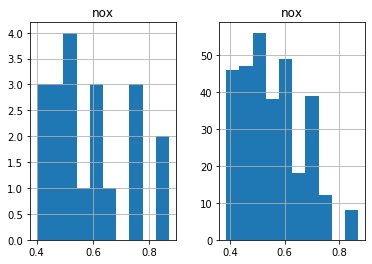

In [95]:
plt.figure(figsize=(18,3))
fig, axes = plt.subplots(1,2)
tracts_charles.hist('nox', ax=axes[0])
away_from_charles.hist('nox', ax=axes[1])

In [96]:
df['tax'].describe()

count    333.000000
mean     409.279279
std      170.841988
min      188.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [98]:
#analyzing tax rate on crime
low_tax = df[df['tax'] <= 330]
low_tax.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [99]:
high_tax = df[df['tax'] > 330]

Text(0.5, 1.0, 'Crime vs. Tax')

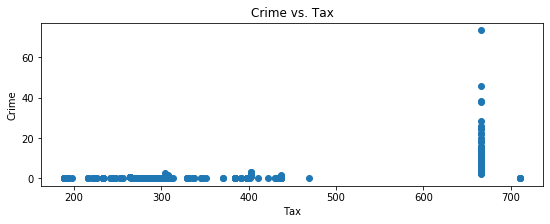

In [103]:
#scatter of total tax rate vs. crime
tax_values = df['tax']
crime_values = df['crim']
plt.figure(figsize=(9,3))
plt.scatter(tax_values, crime_values)
plt.xlabel("Tax")
plt.ylabel("Crime")
plt.title("Crime vs. Tax")

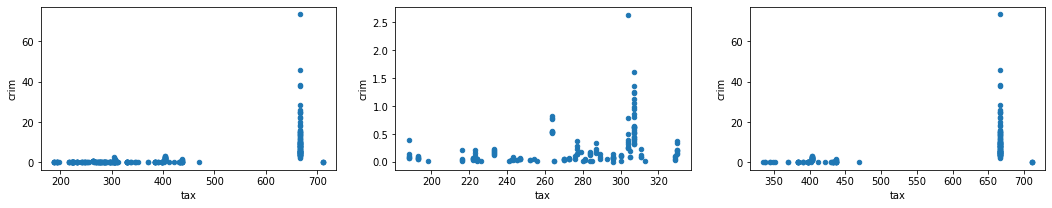

In [110]:
low_tax_values = low_tax['tax']
low_tax_crime = low_tax['crim']
high_tax_values = high_tax['tax']
high_tax_crime = high_tax['crim']


fig, axes = plt.subplots(1, 3, figsize=(18,3))
df.plot.scatter('tax', 'crim', ax=axes[0])
low_tax.plot.scatter('tax', 'crim', ax=axes[1])
high_tax.plot.scatter('tax', 'crim', ax=axes[2])

In [111]:
df['rm'].describe()

count    333.000000
mean       6.265619
std        0.703952
min        3.561000
25%        5.884000
50%        6.202000
75%        6.595000
max        8.725000
Name: rm, dtype: float64

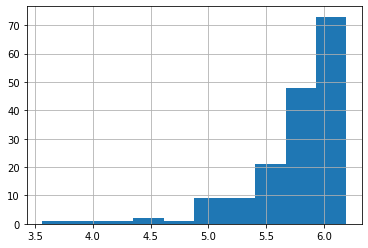

In [113]:
#split rooms - - compare tax rates at different number of rooms
df_room_1 = df[df['rm'] < 6.2]
df_room_2 = df[df['rm'] >= 6.2]
df_room_1['rm'].hist()

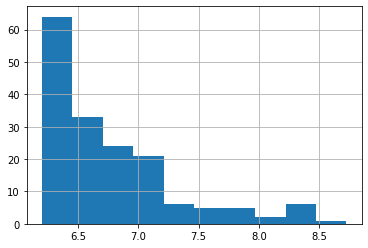

In [114]:
df_room_2['rm'].hist()

In [117]:
df['age'].describe()

count    333.000000
mean      68.226426
std       28.133344
min        6.000000
25%       45.400000
50%       76.700000
75%       93.800000
max      100.000000
Name: age, dtype: float64

In [126]:
#compare first quartile aged houses to third quartile aged houses
first_age_quartile = df.loc[df['age'] < 45.4]
third_age_quartile = df.loc[df['age'] > 93.8]



In [127]:
print(first_age_quartile['crim'].median())
print(third_age_quartile['crim'].median())

0.07875
5.44114


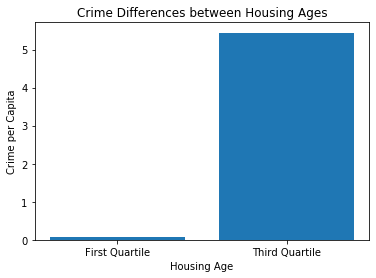

In [139]:
import numpy as np
labels = ['First Quartile', 'Third Quartile']
y = [first_age_quartile['crim'].median(), third_age_quartile['crim'].median()]
x = np.arange(2)

plt.bar(x, y)
plt.xticks(x, labels)
plt.title("Crime Differences between Housing Ages")
plt.xlabel('Housing Age')
plt.ylabel("Crime per Capita")
plt.show()


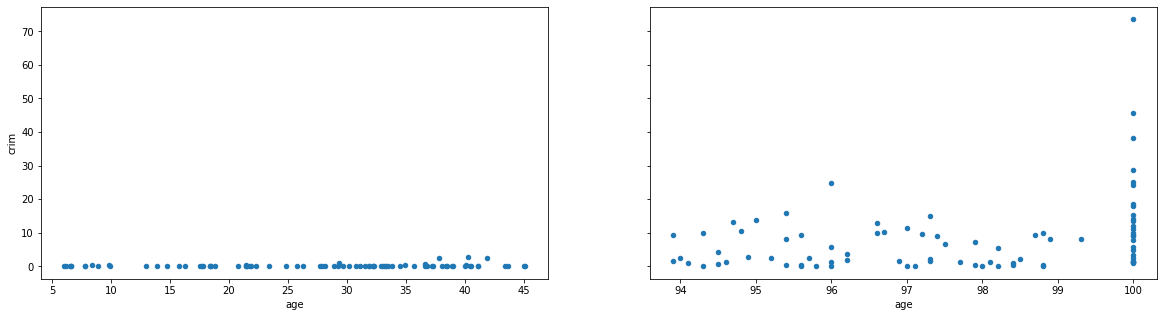

In [147]:
#first quartile housing age against crime
x1 = first_age_quartile['age']
y1 = first_age_quartile['crim']
x2 = third_age_quartile['age']
y2 = third_age_quartile['crim']

fig, axes = plt.subplots(1,2, figsize = (20, 5), sharey=True)
first_age_quartile.plot.scatter('age', 'crim', ax=axes[0])
third_age_quartile.plot.scatter('age', 'crim', ax=axes[1])